In [2]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load CSV from URL
url = 'https://raw.githubusercontent.com/egorpol/beat_it/refs/heads/main/csv/parm_onsets_librosa_unfiltered.csv'
df = pd.read_csv(url)

# Step 3: Display the first few rows of the DataFrame
display(df)


,onset_times
0,0.754649
1,2.089796
2,3.512018
3,4.731066
4,6.141678
...,...
111,77.067029
112,77.635918
113,78.320907
114,79.714104


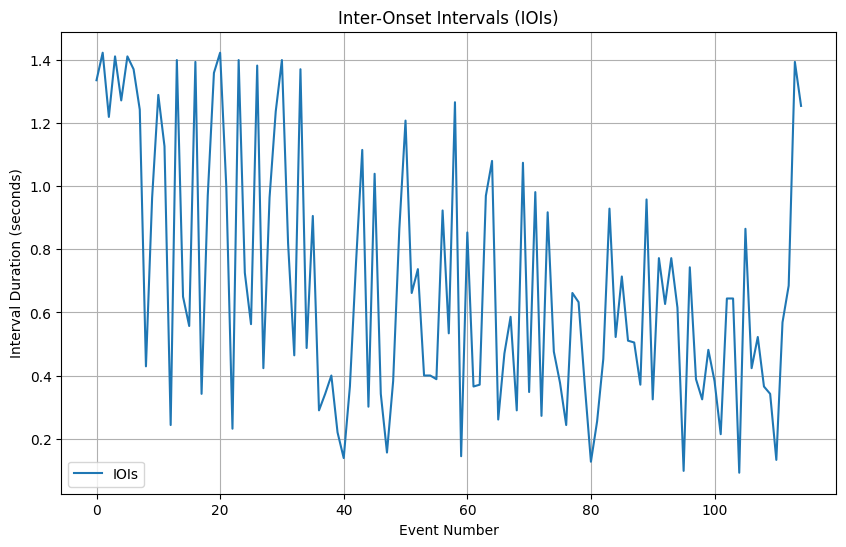

Mean IOI (Average Interval Duration): 0.6975072463768115
Standard Deviation of IOIs: 0.3985384250079776
Coefficient of Variation of IOIs: 0.5713753184331462


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Onset times in seconds
onset_times = df['onset_times'].values

# Calculate inter-onset intervals (IOIs)
iois = np.diff(onset_times)

# Plot the IOIs
plt.figure(figsize=(10, 6))
plt.plot(iois, label="IOIs")
plt.title('Inter-Onset Intervals (IOIs)')
plt.xlabel('Event Number')
plt.ylabel('Interval Duration (seconds)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate standard deviation and coefficient of variation
mean_ioi = np.mean(iois)
std_ioi = np.std(iois)
cv_ioi = std_ioi / mean_ioi  # Coefficient of variation

# Print out results with descriptions
print("Mean IOI (Average Interval Duration):", mean_ioi)
print("Standard Deviation of IOIs:", std_ioi)
print("Coefficient of Variation of IOIs:", cv_ioi)


In [4]:
print(iois)

[1.33514739 1.42222222 1.21904762 1.41061224 1.27129252 1.41061224
 1.36997732 1.24226757 0.42956916 0.96362812 1.28870748 1.1261678
 0.24380952 1.39900227 0.65015873 0.55727891 1.39319728 0.34249433
 0.96943311 1.35836735 1.42222222 0.99845805 0.23219955 1.39900227
 0.72562358 0.5630839  1.3815873  0.42376417 0.96362812 1.23646259
 1.39900227 0.8185034  0.46439909 1.36997732 0.48761905 0.90557823
 0.29024943 0.34249433 0.40054422 0.22058957 0.13931973 0.36571429
 0.76045351 1.11455782 0.30185941 1.03909297 0.34249433 0.15673469
 0.38312925 0.86494331 1.20743764 0.66176871 0.73723356 0.40054422
 0.40054422 0.38893424 0.9229932  0.53405896 1.26548753 0.14512472
 0.85333333 0.36571429 0.37151927 0.96943311 1.07972789 0.26122449
 0.47020408 0.58630385 0.29024943 1.0739229  0.34829932 0.98104308
 0.27283447 0.91718821 0.47600907 0.37732426 0.24380952 0.66176871
 0.63274376 0.37151927 0.12770975 0.2554195  0.45278912 0.92879819
 0.52244898 0.71401361 0.510839   0.50503401 0.37151927 0.95782

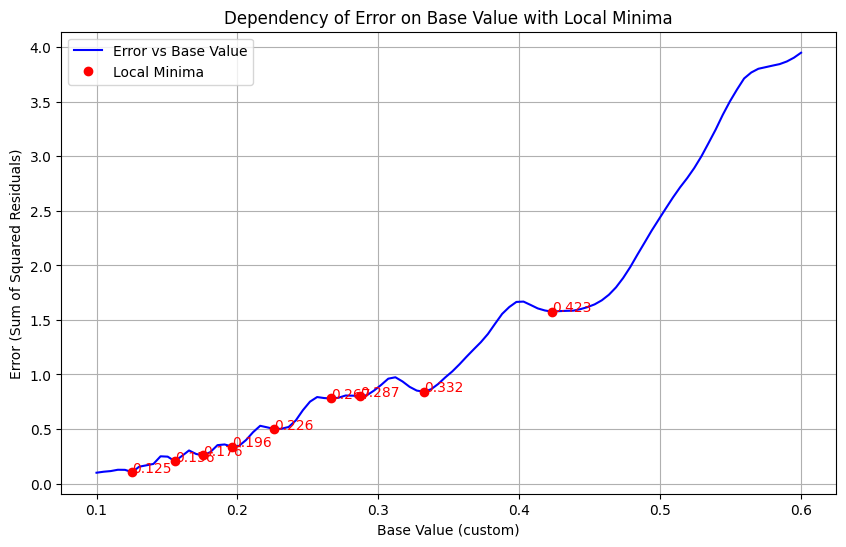

Local minima (base values) and corresponding errors:
Base Value: 0.12525, Error: 0.10464
Base Value: 0.15556, Error: 0.20507
Base Value: 0.17576, Error: 0.25766
Base Value: 0.19596, Error: 0.33967
Base Value: 0.22626, Error: 0.49955
Base Value: 0.26667, Error: 0.78022
Base Value: 0.28687, Error: 0.80204
Base Value: 0.33232, Error: 0.84172
Base Value: 0.42323, Error: 1.57586


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example data (replace with actual data)
data = iois

# Define a range of base values to explore
base_values = np.linspace(0.1, 0.6, 100)  # Adjust range if needed

# Initialize an empty list to store the errors
errors = []

# Loop through different base values and compute the error for each
for base_value_custom in base_values:
    # Calculate multipliers and reconstructed data
    multipliers = np.round(data / base_value_custom)
    reconstructed_data = base_value_custom * multipliers

    # Calculate the residuals and error (sum of squared residuals)
    residuals = data - reconstructed_data
    error = np.sum(residuals**2)

    # Append the error to the list
    errors.append(error)

# Convert errors to a numpy array for further processing
errors = np.array(errors)

# Find local minima (by finding peaks of the negative error array)
minima_indices, _ = find_peaks(-errors)

# Plotting the dependency of the error on the base_value_custom
plt.figure(figsize=(10, 6))
plt.plot(base_values, errors, label='Error vs Base Value', color='blue')

# Mark the local minima
plt.plot(base_values[minima_indices], errors[minima_indices], 'ro', label='Local Minima')

# Annotate the local minima on the plot
for idx in minima_indices:
    plt.text(base_values[idx], errors[idx], f'{base_values[idx]:.3f}', color='red')

plt.title('Dependency of Error on Base Value with Local Minima')
plt.xlabel('Base Value (custom)')
plt.ylabel('Error (Sum of Squared Residuals)')
plt.grid(True)
plt.legend()
plt.show()

# Print out the local minima values
print("Local minima (base values) and corresponding errors:")
for idx in minima_indices:
    print(f"Base Value: {base_values[idx]:.5f}, Error: {errors[idx]:.5f}")


In [6]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load CSV from URL
url = 'https://raw.githubusercontent.com/egorpol/beat_it/refs/heads/main/csv/parm_onsets_librosa_drops_filtered.csv'
df2 = pd.read_csv(url)

# Step 3: Display the first few rows of the DataFrame
display(df2)


,onset_times
0,0.754649
1,2.089796
2,3.512018
3,4.731066
4,6.141678
...,...
56,75.702857
57,76.933515
58,78.320907
59,79.714104


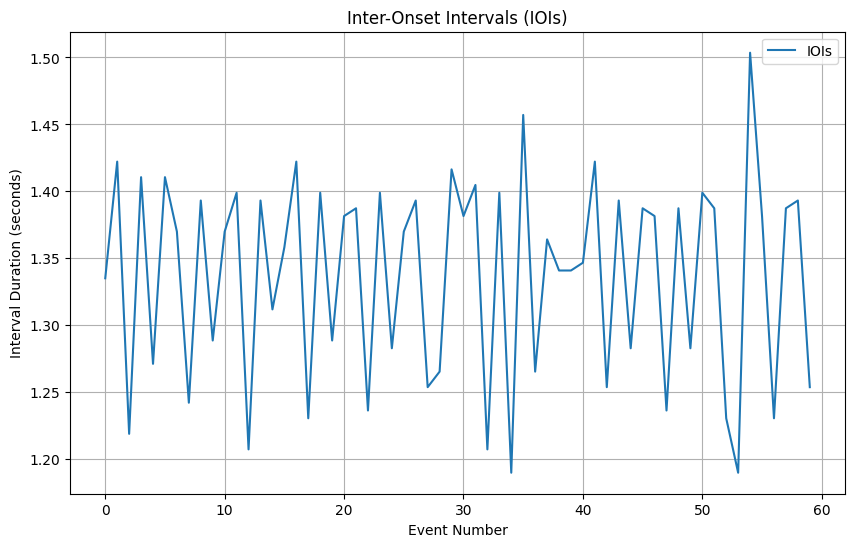

Mean IOI (Average Interval Duration): 1.336888888888889
Standard Deviation of IOIs: 0.07627395779210684
Coefficient of Variation of IOIs: 0.05705332614103736


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Onset times in seconds
onset_times = df2['onset_times'].values

# Calculate inter-onset intervals (IOIs)
iois2 = np.diff(onset_times)

# Plot the IOIs
plt.figure(figsize=(10, 6))
plt.plot(iois2, label="IOIs")
plt.title('Inter-Onset Intervals (IOIs)')
plt.xlabel('Event Number')
plt.ylabel('Interval Duration (seconds)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate standard deviation and coefficient of variation
mean_ioi = np.mean(iois2)
std_ioi = np.std(iois2)
cv_ioi = std_ioi / mean_ioi  # Coefficient of variation

# Print out results with descriptions
print("Mean IOI (Average Interval Duration):", mean_ioi)
print("Standard Deviation of IOIs:", std_ioi)
print("Coefficient of Variation of IOIs:", cv_ioi)


In [15]:
# Calculate the range of IOIs (max - min), which gives the spread between the longest and shortest intervals
range = np.ptp(iois2)

# Calculate the mean of the IOIs, representing the average interval between peaks
mean = np.mean(iois2)

# Calculate the median of the IOIs, representing the midpoint value of the intervals
median = np.median(iois2)

# Calculate the average BPM (beats per minute), where BPM is inversely related to the average IOI (60 seconds / mean IOI)
bpm = 60 / mean

# Calculate the minimum IOI, representing the shortest interval between peaks
min_ioi = np.min(iois2)

# Calculate the maximum IOI, representing the longest interval between peaks
max_ioi = np.max(iois2)

# Print the results
print("Range of IOIs:", range)
print("Minimum IOI:", min_ioi)
print("Maximum IOI:", max_ioi)
print("Mean of IOIs:", mean)
print("Median of IOIs:", median)
print("Average BPM:", bpm)


Range of IOIs: 0.3134693877551058
Minimum IOI: 1.1900226757369552
Maximum IOI: 1.503492063492061
Mean of IOIs: 1.336888888888889
Median of IOIs: 1.3699773242630382
Average BPM: 44.88031914893617


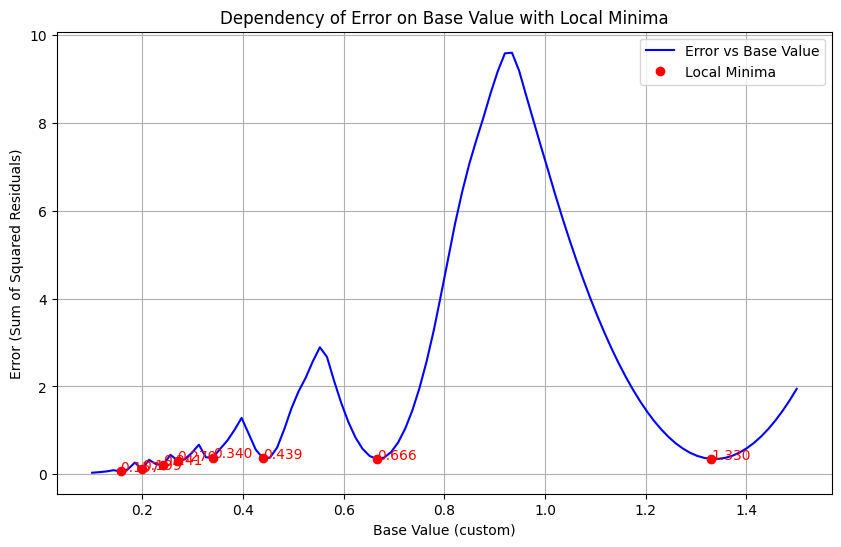

Local minima (base values) and corresponding errors:
Base Value: 0.15657, Error: 0.06639
Base Value: 0.19899, Error: 0.11744
Base Value: 0.24141, Error: 0.21956
Base Value: 0.26970, Error: 0.31410
Base Value: 0.34040, Error: 0.38385
Base Value: 0.43939, Error: 0.37006
Base Value: 0.66566, Error: 0.35093
Base Value: 1.33030, Error: 0.35167


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example data (replace with actual data)
data = iois2

# Define a range of base values to explore
base_values = np.linspace(0.1, 1.5, 100)  # Adjust range if needed

# Initialize an empty list to store the errors
errors = []

# Loop through different base values and compute the error for each
for base_value_custom in base_values:
    # Calculate multipliers and reconstructed data
    multipliers = np.round(data / base_value_custom)
    reconstructed_data = base_value_custom * multipliers

    # Calculate the residuals and error (sum of squared residuals)
    residuals = data - reconstructed_data
    error = np.sum(residuals**2)

    # Append the error to the list
    errors.append(error)

# Convert errors to a numpy array for further processing
errors = np.array(errors)

# Find local minima (by finding peaks of the negative error array)
minima_indices, _ = find_peaks(-errors)

# Plotting the dependency of the error on the base_value_custom
plt.figure(figsize=(10, 6))
plt.plot(base_values, errors, label='Error vs Base Value', color='blue')

# Mark the local minima
plt.plot(base_values[minima_indices], errors[minima_indices], 'ro', label='Local Minima')

# Annotate the local minima on the plot
for idx in minima_indices:
    plt.text(base_values[idx], errors[idx], f'{base_values[idx]:.3f}', color='red')

plt.title('Dependency of Error on Base Value with Local Minima')
plt.xlabel('Base Value (custom)')
plt.ylabel('Error (Sum of Squared Residuals)')
plt.grid(True)
plt.legend()
plt.show()

# Print out the local minima values
print("Local minima (base values) and corresponding errors:")
for idx in minima_indices:
    print(f"Base Value: {base_values[idx]:.5f}, Error: {errors[idx]:.5f}")


Error (sum of squared residuals): 0.3727970723104


,Original IOI,Multiplier,Reconstructed IOI,Residual
0,1.335147,3.0,1.317,0.018147
1,1.422222,3.0,1.317,0.105222
2,1.219048,3.0,1.317,-0.097952
3,1.410612,3.0,1.317,0.093612
4,1.271293,3.0,1.317,-0.045707
5,1.410612,3.0,1.317,0.093612
6,1.369977,3.0,1.317,0.052977
7,1.242268,3.0,1.317,-0.074732
8,1.393197,3.0,1.317,0.076197
9,1.288707,3.0,1.317,-0.028293


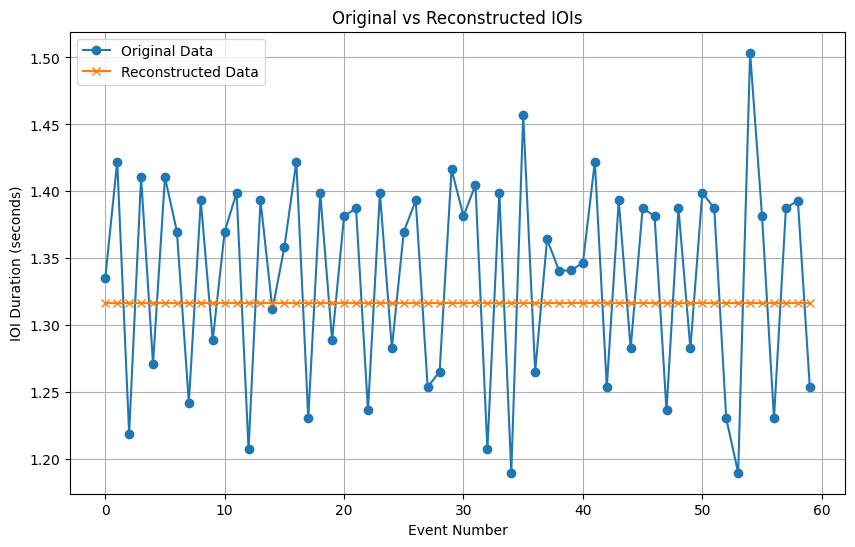

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with actual data)
data = iois2

# Custom base value (input your desired base value here)
base_value_custom = 0.439  # Adjust this value as needed

# Calculate multipliers and reconstructed data
multipliers = np.round(data / base_value_custom)
reconstructed_data = base_value_custom * multipliers

# Error calculation (Sum of squared residuals)
residuals = data - reconstructed_data
error = np.sum(residuals**2)

print(f"Error (sum of squared residuals): {error}")

# Create a DataFrame with Original IOI, Multiplier, Reconstructed IOI, Residual
df_results = pd.DataFrame({
    'Original IOI': data,
    'Multiplier': multipliers,
    'Reconstructed IOI': reconstructed_data,
    'Residual': residuals
})

# Display the DataFrame in Colab
display(df_results)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data', marker='o')
plt.plot(reconstructed_data, label='Reconstructed Data', marker='x')
plt.legend()
plt.title('Original vs Reconstructed IOIs')
plt.xlabel('Event Number')
plt.ylabel('IOI Duration (seconds)')
plt.grid(True)
plt.show()


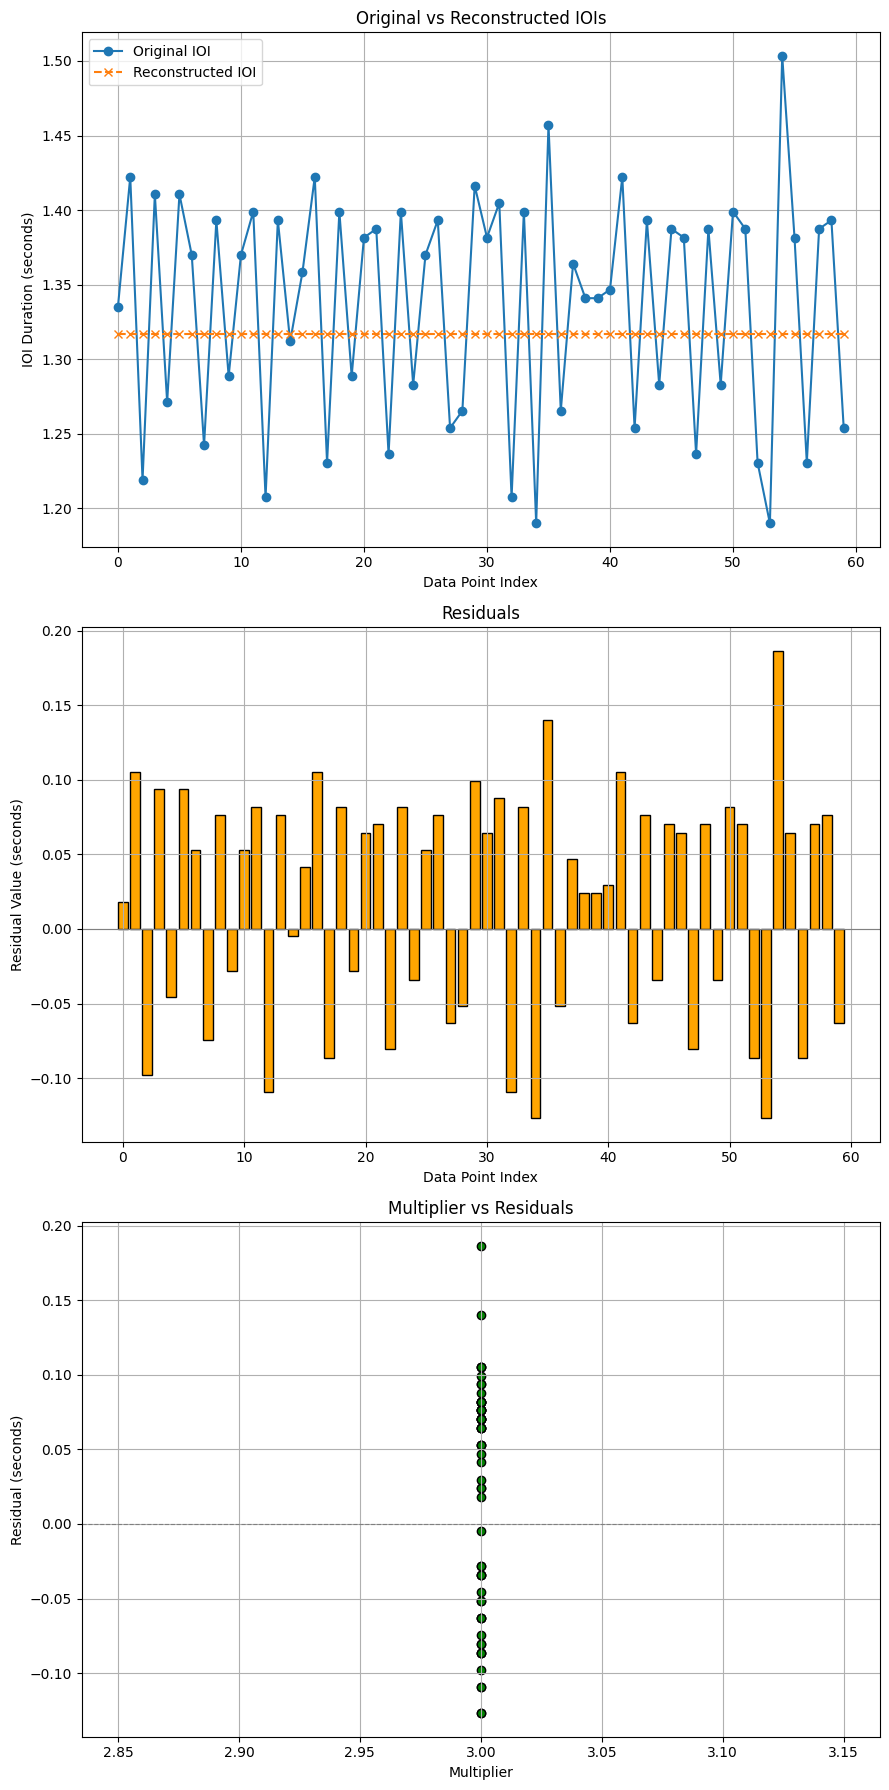

In [ ]:
# Plotting Original vs Reconstructed IOIs and other subplots
plt.figure(figsize=(9, 18))  # Adjust figure size for vertical alignment

# Subplot 1: Original vs Reconstructed IOIs
plt.subplot(3, 1, 1)
plt.plot(data, label='Original IOI', marker='o', linestyle='-')
plt.plot(reconstructed_data, label='Reconstructed IOI', marker='x', linestyle='--')
plt.title('Original vs Reconstructed IOIs')
plt.xlabel('Data Point Index')
plt.ylabel('IOI Duration (seconds)')
plt.legend()
plt.grid(True)

# Subplot 2: Residuals
plt.subplot(3, 1, 2)
plt.bar(range(len(residuals)), residuals, color='orange', edgecolor='black')
plt.axhline(0, color='gray', linewidth=0.8)
plt.title('Residuals')
plt.xlabel('Data Point Index')
plt.ylabel('Residual Value (seconds)')
plt.grid(True)

# Subplot 3: Multiplier vs Residuals
plt.subplot(3, 1, 3)
plt.scatter(df_results['Multiplier'], df_results['Residual'], color='green', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Adding a line at y=0 for reference
plt.title('Multiplier vs Residuals')
plt.xlabel('Multiplier')
plt.ylabel('Residual (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [17]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load CSV from URL
url = 'https://raw.githubusercontent.com/egorpol/beat_it/refs/heads/main/csv/parm_onsets_synth_manual_tagged.csv'
df3 = pd.read_csv(url)

# Step 3: Display the first few rows of the DataFrame
display(df3)


,TIME,LABEL
0,0.754646,NaN
1,2.089792,NaN
2,3.512021,NaN
3,4.731063,NaN
4,6.141687,NaN
...,...,...
111,77.067021,NaN
112,77.635917,s
113,78.320917,s
114,79.714104,NaN


In [18]:
df_filtered = df3[df3['LABEL'] == 's']


display(df_filtered)

,TIME,LABEL
6,8.823583,s
7,10.193563,s
9,11.865396,s
10,12.829021,s
12,15.243896,s
...,...,...
108,76.225313,s
109,76.591021,s
110,76.933521,s
112,77.635917,s


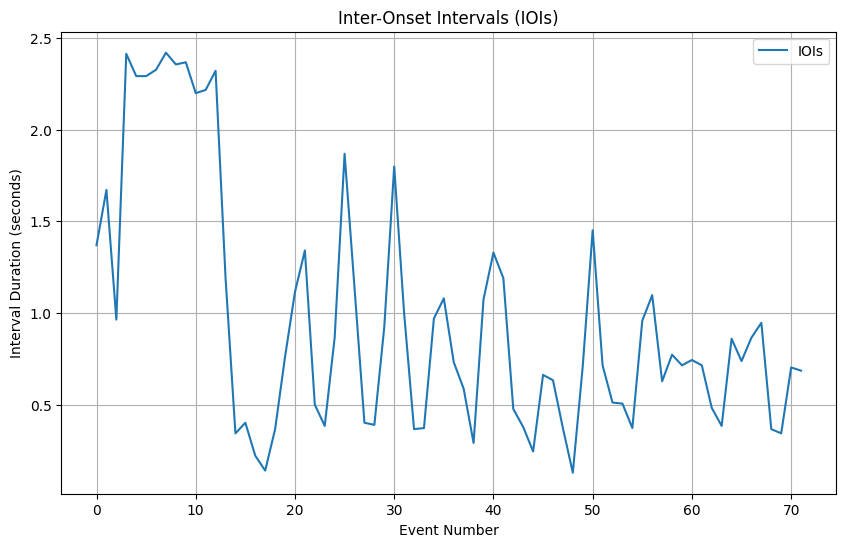

Mean IOI (Average Interval Duration): 0.9652407407500001
Standard Deviation of IOIs: 0.6602474626140401
Coefficient of Variation of IOIs: 0.6840236168450808


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Onset times in seconds
onset_times = df_filtered['TIME'].values

# Calculate inter-onset intervals (IOIs)
iois3 = np.diff(onset_times)

# Plot the IOIs
plt.figure(figsize=(10, 6))
plt.plot(iois3, label="IOIs")
plt.title('Inter-Onset Intervals (IOIs)')
plt.xlabel('Event Number')
plt.ylabel('Interval Duration (seconds)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate standard deviation and coefficient of variation
mean_ioi = np.mean(iois3)
std_ioi = np.std(iois3)
cv_ioi = std_ioi / mean_ioi  # Coefficient of variation

# Print out results with descriptions
print("Mean IOI (Average Interval Duration):", mean_ioi)
print("Standard Deviation of IOIs:", std_ioi)
print("Coefficient of Variation of IOIs:", cv_ioi)

In [20]:
print(iois3)

[1.36997917 1.67183333 0.963625   2.414875   2.29297917 2.29295833
 2.3278125  2.42066667 2.35683333 2.3684375  2.20008333 2.21752083
 2.32197917 1.19583333 0.3425     0.40054167 0.22058333 0.13933333
 0.36570833 0.76045833 1.11454167 1.34095833 0.49922917 0.383125
 0.86495833 1.86920833 1.13777083 0.40054167 0.3889375  0.923
 1.79954167 0.99845833 0.36570833 0.37152083 0.9694375  1.07972917
 0.73141667 0.5863125  0.29025    1.07391667 1.32935417 1.19002083
 0.476      0.37733333 0.24379167 0.66177083 0.63275    0.37152083
 0.12770833 0.70820833 1.45125    0.71402083 0.51083333 0.50502083
 0.37152083 0.95783333 1.09714583 0.6269375  0.7720625  0.71402083
 0.74302083 0.71402083 0.4818125  0.383125   0.85914583 0.73722917
 0.8649375  0.94622917 0.36570833 0.3425     0.70239583 0.685     ]


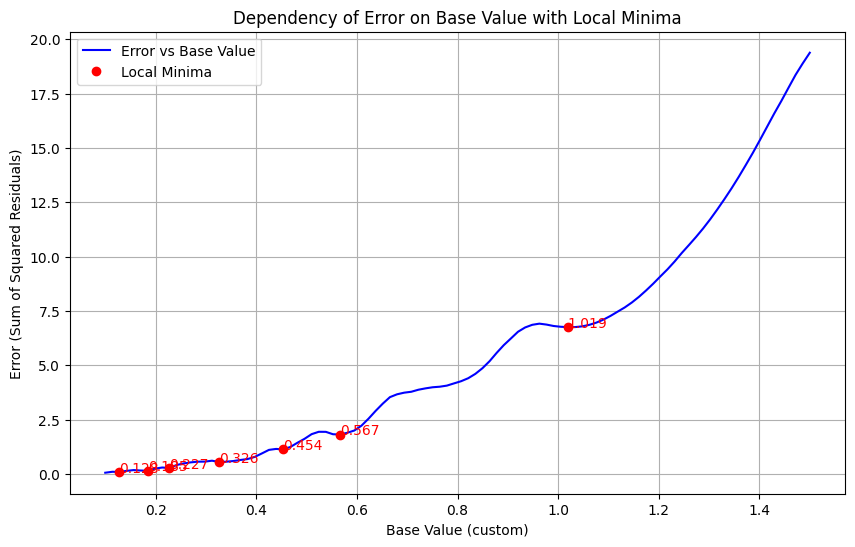

Local minima (base values) and corresponding errors:
Base Value: 0.12828, Error: 0.08956
Base Value: 0.18485, Error: 0.14630
Base Value: 0.22727, Error: 0.27317
Base Value: 0.32626, Error: 0.54625
Base Value: 0.45354, Error: 1.12956
Base Value: 0.56667, Error: 1.81141
Base Value: 1.01919, Error: 6.75416


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example data (replace with actual data)
data = iois3

# Define a range of base values to explore
base_values = np.linspace(0.1, 1.5, 100)  # Adjust range if needed

# Initialize an empty list to store the errors
errors = []

# Loop through different base values and compute the error for each
for base_value_custom in base_values:
    # Calculate multipliers and reconstructed data
    multipliers = np.round(data / base_value_custom)
    reconstructed_data = base_value_custom * multipliers

    # Calculate the residuals and error (sum of squared residuals)
    residuals = data - reconstructed_data
    error = np.sum(residuals**2)

    # Append the error to the list
    errors.append(error)

# Convert errors to a numpy array for further processing
errors = np.array(errors)

# Find local minima (by finding peaks of the negative error array)
minima_indices, _ = find_peaks(-errors)

# Plotting the dependency of the error on the base_value_custom
plt.figure(figsize=(10, 6))
plt.plot(base_values, errors, label='Error vs Base Value', color='blue')

# Mark the local minima
plt.plot(base_values[minima_indices], errors[minima_indices], 'ro', label='Local Minima')

# Annotate the local minima on the plot
for idx in minima_indices:
    plt.text(base_values[idx], errors[idx], f'{base_values[idx]:.3f}', color='red')

plt.title('Dependency of Error on Base Value with Local Minima')
plt.xlabel('Base Value (custom)')
plt.ylabel('Error (Sum of Squared Residuals)')
plt.grid(True)
plt.legend()
plt.show()

# Print out the local minima values
print("Local minima (base values) and corresponding errors:")
for idx in minima_indices:
    print(f"Base Value: {base_values[idx]:.5f}, Error: {errors[idx]:.5f}")


Error (sum of squared residuals): 0.530194763039067


,Original IOI,Multiplier,Reconstructed IOI,Residual
0,1.369979,5.0,1.3485,0.021479
1,1.671833,6.0,1.6182,0.053633
2,0.963625,4.0,1.0788,-0.115175
3,2.414875,9.0,2.4273,-0.012425
4,2.292979,9.0,2.4273,-0.134321
...,...,...,...,...
67,0.946229,4.0,1.0788,-0.132571
68,0.365708,1.0,0.2697,0.096008
69,0.342500,1.0,0.2697,0.072800
70,0.702396,3.0,0.8091,-0.106704


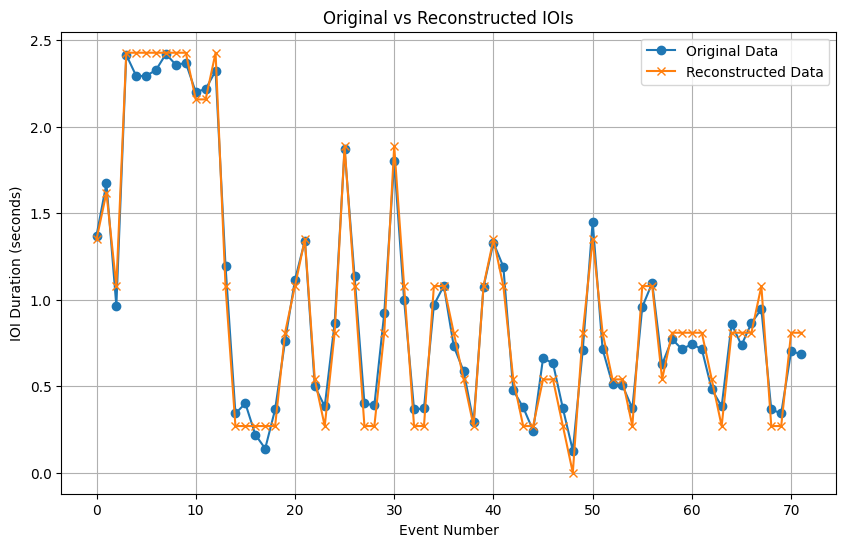

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with actual data)
data = iois3

# Custom base value (input your desired base value here)
base_value_custom = 0.2697  # Adjust this value as needed

# Calculate multipliers and reconstructed data
multipliers = np.round(data / base_value_custom)
reconstructed_data = base_value_custom * multipliers

# Error calculation (Sum of squared residuals)
residuals = data - reconstructed_data
error = np.sum(residuals**2)

print(f"Error (sum of squared residuals): {error}")

# Create a DataFrame with Original IOI, Multiplier, Reconstructed IOI, Residual
df_results = pd.DataFrame({
    'Original IOI': data,
    'Multiplier': multipliers,
    'Reconstructed IOI': reconstructed_data,
    'Residual': residuals
})

# Display the DataFrame in Colab
display(df_results)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data', marker='o')
plt.plot(reconstructed_data, label='Reconstructed Data', marker='x')
plt.legend()
plt.title('Original vs Reconstructed IOIs')
plt.xlabel('Event Number')
plt.ylabel('IOI Duration (seconds)')
plt.grid(True)
plt.show()


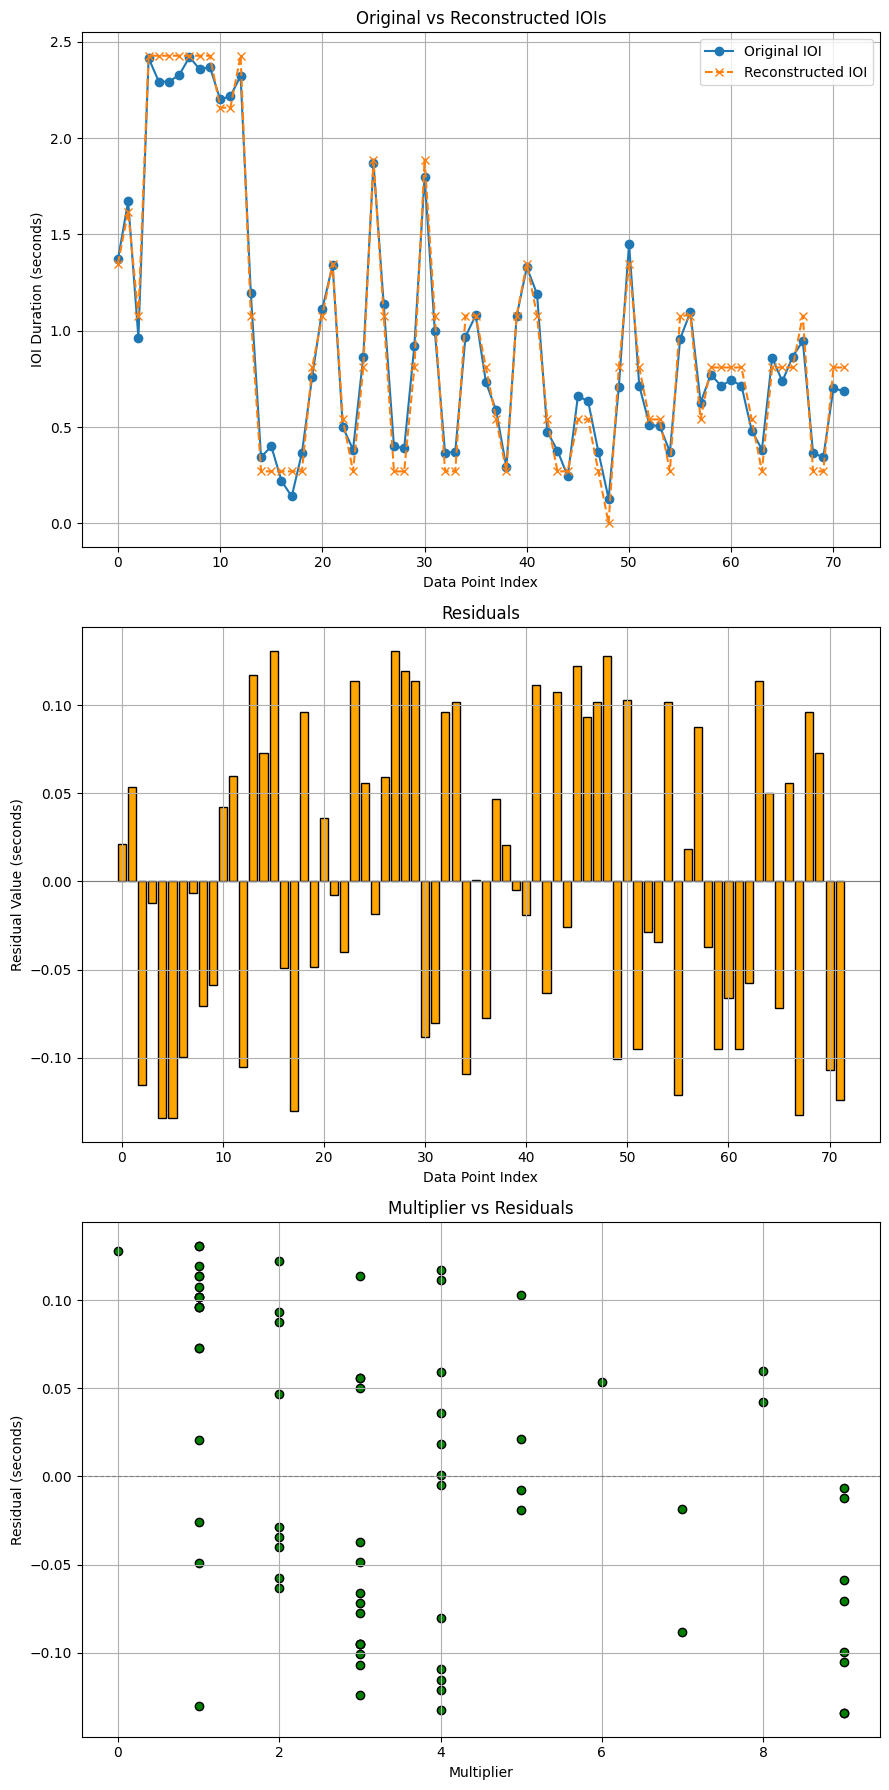

In [ ]:
# Plotting Original vs Reconstructed IOIs and other subplots
plt.figure(figsize=(9, 18))  # Adjust figure size for vertical alignment

# Subplot 1: Original vs Reconstructed IOIs
plt.subplot(3, 1, 1)
plt.plot(data, label='Original IOI', marker='o', linestyle='-')
plt.plot(reconstructed_data, label='Reconstructed IOI', marker='x', linestyle='--')
plt.title('Original vs Reconstructed IOIs')
plt.xlabel('Data Point Index')
plt.ylabel('IOI Duration (seconds)')
plt.legend()
plt.grid(True)

# Subplot 2: Residuals
plt.subplot(3, 1, 2)
plt.bar(range(len(residuals)), residuals, color='orange', edgecolor='black')
plt.axhline(0, color='gray', linewidth=0.8)
plt.title('Residuals')
plt.xlabel('Data Point Index')
plt.ylabel('Residual Value (seconds)')
plt.grid(True)

# Subplot 3: Multiplier vs Residuals
plt.subplot(3, 1, 3)
plt.scatter(df_results['Multiplier'], df_results['Residual'], color='green', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Adding a line at y=0 for reference
plt.title('Multiplier vs Residuals')
plt.xlabel('Multiplier')
plt.ylabel('Residual (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, Span
from bokeh.io import push_notebook

# Initialize Bokeh output
output_notebook()

# Calculate the cumulative time axis
df_results['Cumulative Time'] = df_results['Original IOI'].cumsum()


# Prepare the data source
source = ColumnDataSource(df_results)

# Initialize the Bokeh figure with 'width' and 'height'
p = figure(title="IOI Residuals Over Time",
           x_axis_label='Cumulative Time (seconds)',
           y_axis_label='Residual (seconds)',
           width=900,  # Use 'width' instead of 'plot_width'
           height=400,  # Use 'height' instead of 'plot_height'
           tools="pan,wheel_zoom,box_zoom,reset,save")

# Add Residuals as circles
residuals = p.circle('Cumulative Time', 'Residual', size=10, color='orange', alpha=0.6, source=source, legend_label="Residuals")

# Add Cues as vertical dashed lines
for time in df_results['Cumulative Time']:
    span = Span(location=time, dimension='height', line_color='gray', line_dash='dashed', line_width=1)
    p.add_layout(span)

# Add HoverTool for Residuals
hover = HoverTool(tooltips=[
    ("Index", "@index"),
    ("Cumulative Time", "@{Cumulative Time}{0.000} s"),
    ("Residual", "@Residual{0.000} s"),
    ("Original IOI", "@{Original IOI}{0.000} s"),
    ("Reconstructed IOI", "@{Reconstructed IOI}{0.000} s"),
    ("Multiplier", "@Multiplier")
], renderers=[residuals])

p.add_tools(hover)

# Add horizontal line at y=0
zero_span = Span(location=0, dimension='width', line_color='black', line_dash='solid', line_width=2)
p.add_layout(zero_span)

# Customize the legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Show the plot
show(p)
